In [2]:
!pip uninstall opencv-python
!pip install opencv-contrib-python==3.4.2.17

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6 MB 1.1 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [4]:
import numpy as np
import pandas as pd
from natsort import natsorted
import cv2
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
data_root = '/content/drive/MyDrive/DL_Project_2020A4PS0241P'
data_path = '/content/drive/MyDrive/DL_Project_2020A4PS0241P/dl-classProject-data-15-sub'

In [6]:
from google.colab.patches import cv2_imshow
import os

In [7]:
def alterimaging(image):
  image=cv2.resize(image,(100,100))
  image =cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image=cv2.GaussianBlur(image,(3,3),0)
  clh=cv2.createCLAHE(clipLimit=3)
  image=clh.apply(image)
  return image

In [8]:
templateimg1=cv2.imread('/content/drive/MyDrive/DL_Project_2020A4PS0241P/dl-classProject-data-15-sub/S04-23-05.png',cv2.COLOR_BGR2RGB)
templateimg2=cv2.imread('/content/drive/MyDrive/DL_Project_2020A4PS0241P/dl-classProject-data-15-sub/S04-23-08.png',cv2.COLOR_BGR2RGB)



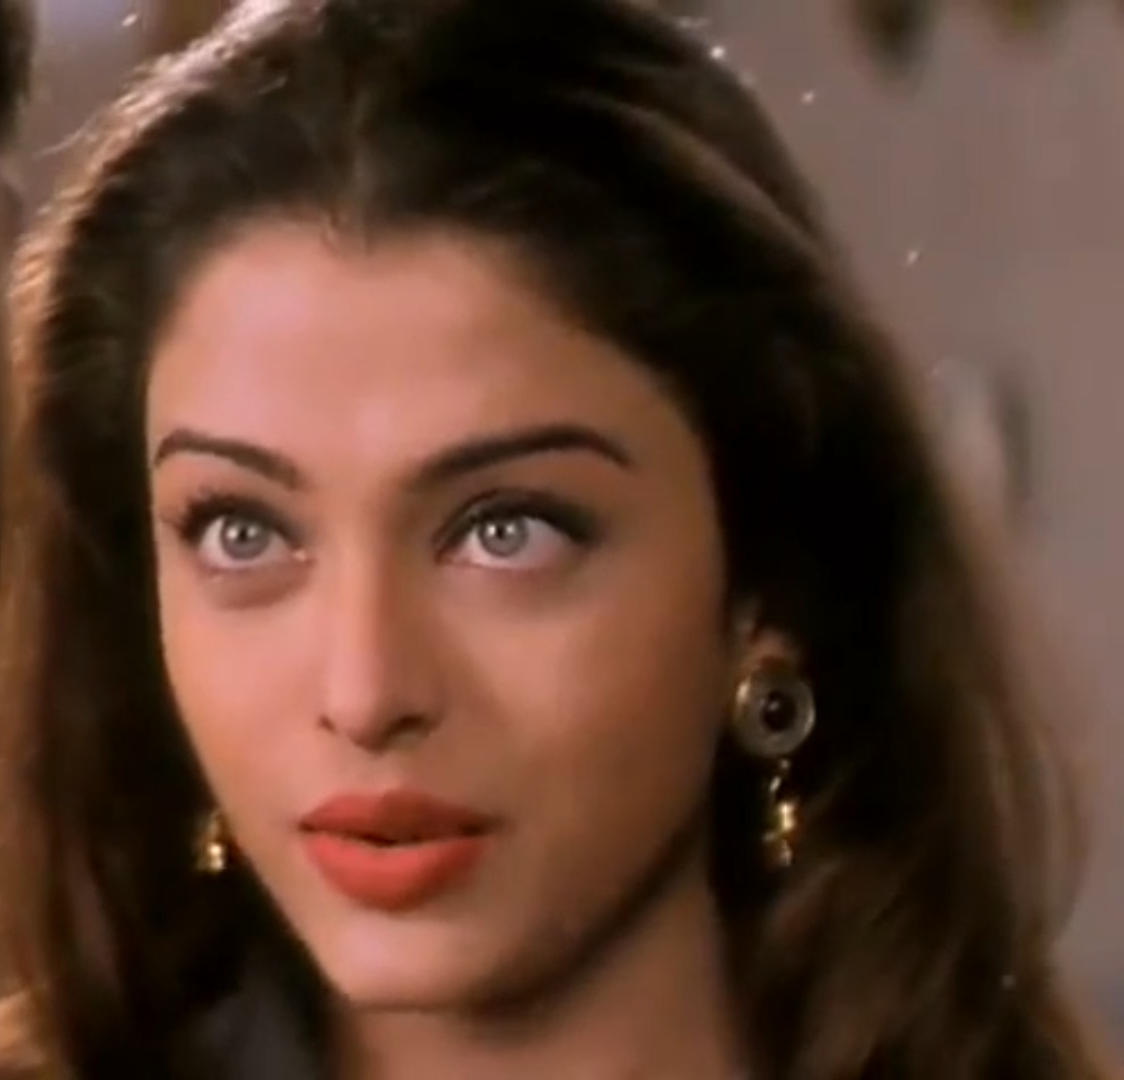

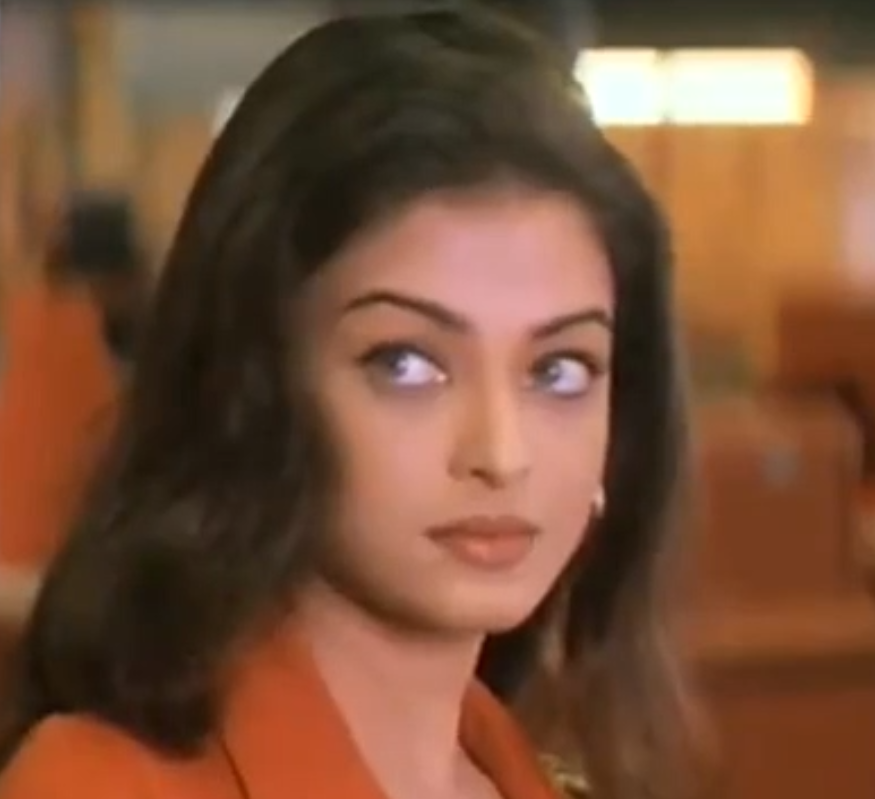

(1080, 1124, 3)


In [9]:
cv2_imshow(templateimg1), cv2_imshow(templateimg2)
print(templateimg1.shape)

In [10]:
templateimg1=alterimaging(templateimg1)
templateimg2=alterimaging(templateimg2)

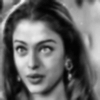

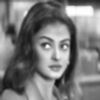

(None, None)

In [11]:
cv2_imshow(templateimg1),cv2_imshow(templateimg2)

In [12]:
def match_features(output_file, algo, bf):
    output = []
    genuine = []
    imposter = []
    for images in natsorted(os.listdir(data_path)):
        str1 = str(images)
        if str1=='.ipynb_checkpoints':
            continue
        img1 = os.path.join(data_path, images)
        #print(img1)
        img1 = cv2.imread(img1)
        img1 = alterimaging(img1)
        kp1, des1 = algo.detectAndCompute(img1,None)
        if len(kp1)>0:
            for image in natsorted(os.listdir(data_path)):
                img2 = os.path.join(data_path, image)
                str2 = str(image)
                ##print(str1) 
                #print(str2)
                if str1 == '.ipynb_checkpoints' or str2 == '.ipynb_checkpoints':
                    continue
                if (str1.split("-")[2]==str2.split("-")[2]):
                    #print(str1.split("-"))
                    continue
                if (img1 != img2):
                    img2 = cv2.imread(img2)
                    img2 = alterimaging(img2)
                    kp2, des2 = algo.detectAndCompute(img2,None)
                
                    if des1 is None:
                        ##file1.write( str1 + " " + str2 + " " + "0" +"\n")
                        output.append([str1, str2, 0])
                        print(str1 + " " + str2 + " " + str(0))
                        continue
                    if des2 is None:
                        ##file1.write( str1 + " " + str2 + " " + "0"+"\n")
                        output.append([str1, str2, 0])
                        print(str1 + " " + str2 + " " + str(0))
                        continue
                    #  print(des1)
                    #  print(des2)
                    #  print(type(des1),type(des2))
                    matches = bf.knnMatch(des1,des2, k=2)
                    dis = bf.match(des1,des2)
                    #----------------------------------------------
                    number_keypoints = 0
                    if len(kp1) <= len(kp2):
                        number_keypoints = len(kp1)
                    else:
                        number_keypoints = len(kp2)
                    good = []
                    #print(matches)
                    try:
                        for m,n in matches:
                            if m.distance < 0.9*n.distance:
                                good.append([m])
                    except:
                        pass 
                    score = len(good) / number_keypoints
                    if(score>1):
                        output.append([str1, str2, score])
                        print(str1 + " " + str2 + " " + str(score))
                        if (str1.split("-")[0]==str2.split("-")[0]):
                            genuine.append(score)
                        else:
                            imposter.append(score)
                    else:
                        output.append([str1, str2, score])
                        print(str1 + " " + str2 + " " + str(score))
                        if (str1.split("-")[0]==str2.split("-")[0]):
                                genuine.append(score)
                        else:
                            imposter.append(score)
    output_df = pd.DataFrame(output)
    output_df.to_csv(output_file)

In [13]:
sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create()
akaze = cv2.AKAZE_create()
bf = cv2.BFMatcher()

In [14]:
algos = [sift, surf, orb, akaze]

In [ ]:
output_file_sift = '/content/drive/MyDrive/DL_Project_2020A4PS0241P/output_sift.csv'


In [ ]:
match_features(output_file, sift, bf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Streaming output truncated to the last 5000 lines.
S15-51-10.png S07-32-05.jpg 0.5172413793103449
S15-51-10.png S07-32-06.jpg 0.22818791946308725
S15-51-10.png S07-32-07.jpg 0.36585365853658536
S15-51-10.png S07-32-08.jpg 0.43478260869565216
S15-51-10.png S07-32-09.jpg 0.30985915492957744
S15-51-10.png S07-32-10.jpg 0.25925925925925924
S15-51-10.png S07-43-01.jpg 0.1375
S15-51-10.png S07-43-02.jpg 0.2831858407079646
S15-51-10.png S07-43-03.jpg 0.2826086956521739
S15-51-10.png S07-43-04.jpg 0.25806451612903225
S15-51-10.png S07-43-05.jpg 0.4606741573033708
S15-51-10.png S07-43-06.jpg 0.3177570093457944
S15-51-10.png S07-43-07.jpg 0.16774193548387098
S15-51-10.png S07-43-08.jpg 0.2462686567164179
S15-51-10.png S07-43-09.jpg 0.20863309352517986
S15-51-10.png S07-43-10.jpg 0.22608695652173913
S15-51-10.png S07-48-01.jpg 0.4268292682926829
S15-51-10.png S07-48-02.jpg 0.15
S15-51-10.png S07-48-03.jpg 0.19375
S15-51-10.png S07-48-04.jpg 0.23008849557522124
S15-51-10.png S07-48-05.jpg 0.294117

In [ ]:

output_file_surf = '/content/drive/MyDrive/DL_Project_2020A4PS0241P/output_surf.csv'
match_features(output_file_surf, surf, bf)






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Streaming output truncated to the last 5000 lines.
S04-27-05.png S08-38-09.jpg 0.1724137931034483
S04-27-05.png S08-38-10.jpg 0.3103448275862069
S04-27-05.png S08-47-01.jpg 0.20689655172413793
S04-27-05.png S08-47-02.jpg 0.2
S04-27-05.png S08-47-03.jpg 0.25
S04-27-05.png S08-47-04.jpg 0.2962962962962963
S04-27-05.png S08-47-05.jpg 0.23076923076923078
S04-27-05.png S08-47-06.jpg 0.27586206896551724
S04-27-05.png S08-47-07.jpg 0.1724137931034483
S04-27-05.png S08-47-08.jpg 0.1724137931034483
S04-27-05.png S08-47-09.jpg 0.35294117647058826
S04-27-05.png S08-47-10.jpg 0.3333333333333333
S04-27-05.png S08-60-01.jpg 0.2413793103448276
S04-27-05.png S08-60-02.jpg 1.0
S04-27-05.png S08-60-03.jpg 1.0
S04-27-05.png S08-60-04.jpg 0.2692307692307692
S04-27-05.png S08-60-05.jpg 0.38095238095238093
S04-27-05.png S08-60-06.jpg 0.3333333333333333
S04-27-05.png S08-60-07.jpg 0.3448275862068966
S04-27-05.png S08-60-08.jpg 0.5217391304347826
S04-27-05.png S08-60-09.jpg 0.20689655172413793
S04-27-05.png S

In [15]:
output_file_orb = '/content/drive/MyDrive/DL_Project_2020A4PS0241P/output_orb.csv'
match_features(output_file_orb, orb, bf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Streaming output truncated to the last 5000 lines.
S15-51-10.png S07-32-05.jpg 1.3636363636363635
S15-51-10.png S07-32-06.jpg 0.32727272727272727
S15-51-10.png S07-32-07.jpg 0.85
S15-51-10.png S07-32-08.jpg 0.2391304347826087
S15-51-10.png S07-32-09.jpg 0.30952380952380953
S15-51-10.png S07-32-10.jpg 0.3333333333333333
S15-51-10.png S07-43-01.jpg 0.24561403508771928
S15-51-10.png S07-43-02.jpg 0.4375
S15-51-10.png S07-43-03.jpg 0.2909090909090909
S15-51-10.png S07-43-04.jpg 0.3611111111111111
S15-51-10.png S07-43-05.jpg 0.3
S15-51-10.png S07-43-06.jpg 0.2553191489361702
S15-51-10.png S07-43-07.jpg 0.2857142857142857
S15-51-10.png S07-43-08.jpg 0.36538461538461536
S15-51-10.png S07-43-09.jpg 0.22448979591836735
S15-51-10.png S07-43-10.jpg 0.2978723404255319
S15-51-10.png S07-48-01.jpg 0.5925925925925926
S15-51-10.png S07-48-02.jpg 0.3584905660377358
S15-51-10.png S07-48-03.jpg 0.26
S15-51-10.png S07-48-04.jpg 0.391304347826087
S15-51-10.png S07-48-05.jpg 0.2727272727272727
S15-51-10.png

In [16]:
output_file_akaze = '/content/drive/MyDrive/DL_Project_2020A4PS0241P/output_akaze.csv'
match_features(output_file_akaze, akaze,bf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Streaming output truncated to the last 5000 lines.
S15-51-10.png S07-32-05.jpg 0.2
S15-51-10.png S07-32-06.jpg 0.3125
S15-51-10.png S07-32-07.jpg 0.5555555555555556
S15-51-10.png S07-32-08.jpg 0.38461538461538464
S15-51-10.png S07-32-09.jpg 0.2
S15-51-10.png S07-32-10.jpg 0.3333333333333333
S15-51-10.png S07-43-01.jpg 0.4666666666666667
S15-51-10.png S07-43-02.jpg 0.4666666666666667
S15-51-10.png S07-43-03.jpg 0.2727272727272727
S15-51-10.png S07-43-04.jpg 0.8
S15-51-10.png S07-43-05.jpg 0.4166666666666667
S15-51-10.png S07-43-06.jpg 0.23529411764705882
S15-51-10.png S07-43-07.jpg 0.25
S15-51-10.png S07-43-08.jpg 0.47058823529411764
S15-51-10.png S07-43-09.jpg 0.4166666666666667
S15-51-10.png S07-43-10.jpg 0.6153846153846154
S15-51-10.png S07-48-01.jpg 1.0
S15-51-10.png S07-48-02.jpg 0.375
S15-51-10.png S07-48-03.jpg 0.21428571428571427
S15-51-10.png S07-48-04.jpg 0.3333333333333333
S15-51-10.png S07-48-05.jpg 0.25
S15-51-10.png S07-48-06.jpg 0.05555555555555555
S15-51-10.png S07-48-07